 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
import pandas as pd
import sys
sys.path.append('..')
from lib import Node
from lib import Tree

In [2]:
df = pd.read_pickle('../data/parsed/pickled_data_test.pickle')

In [7]:
### Ju Yun's test suite 11-11

test = df.loc[df['Scenario'] == '401']
test_labeled = test.loc[test['Label'] != '-1']
test = test_labeled[0:100]
#test = test.sample(frac=1)
test = test.reset_index(drop=True)

# print(test.loc[test['From'].apply(lambda x: x[0]) == 'david.forster@enron.com'].index.values)
# print(test.loc[test['From'])
ls = ['Date']
cat = ['From', 'To']
#data, depth, benchmark, rows, features, cat_features)
tree = Tree(test, 100, None, range(test.shape[0]), ls, cat)
tree.fit()
print(tree)

# print(type(test['Date'][0]))

feature we used: Date
I'm left!
There are no more features to split on.
I'm right!
There are no more features to split on.
['Date']
[5068045361, 0.28220000000000006, 100, Date, 2001-09-17 09:29:34-07:00, [('l', 4460544738), ('r', 3651800617)]]

--------------------------------------------------
[4460544738, 0.35622768325981946, 69, None, None, []]
[3651800617, 0.06243496357960448, 31, None, None, []]

--------------------------------------------------



In [7]:
rows = [34, 39, 56]
feature = 'To'
test.loc[rows][feature]

34    [cameron@perfect.com]
39    [cameron@perfect.com]
56    [cameron@perfect.com]
Name: To, dtype: object

In [7]:
test.loc[test['From'].apply(lambda x: 'david.forster@enron.com' in x)].index.values

array([84, 89, 98])

In [13]:
test.loc[test['From'].apply(lambda x: 'david.forster@enron.com' not in x)].index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85,
       86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 99])

In [ ]:
rows = [1, 30, 32, 43, 46]

In [ ]:
members = df.loc[rows]['Label'].values

In [ ]:
members

In [ ]:
members == '-1'

In [ ]:
a = members[members == '-1']
a

TODO:

- Dates to some kind of number
- ~~from, to: split using membership~~
- dates: split on number
- think about whether numerical (or dates specifically) should be 
- subject: find subjects that are equal, or lsa matrix


In [ ]:
one = df.loc[df['Scenario'] == '401']
one_labeled = one.loc[one['Label'] != '-1']
one_labeled.shape

In [ ]:
def get_first(l):
    return l[0]

In [ ]:
df['From'].apply(lambda x: x[0]).unique()[0]

In [ ]:
##test.loc[test['From'].apply(lambda x: x[0]) == 'david.forster@enron.com'].index.valuestest[0:1]

In [ ]:
test = df.loc[df['Scenario'] == '401']
test_labeled = test.loc[test['Label'] != '-1']
test = test_labeled[0:100]

In [ ]:
test.shape

In [ ]:
# test = test.sample(frac=1)
test = test.reset_index(drop=True)

In [ ]:
ls = ['From']

In [ ]:
rows = [80, 81, 82, 85, 86, 87, 88]
address = 'registrar.isc@enron.com'
feature = 'From'
# uniques = test[feature].apply(lambda x: x[0]).unique()
# to_parse = [(test['From'][x],test['Label'][x]) for x in rows]
# to_parse = pd.DataFrame(to_parse, columns=('From','Label'), index=rows)
uniques = test.loc[rows]['From'].apply(lambda x: x[0]).unique()
# to_parse.loc[to_parse['From'].apply(lambda x: x[0]) == address].index.values
uniques

In [ ]:
#data, depth, benchmark, rows, features, cat_features)
tree = Tree(test, 4, None, range(test.shape[0]), ls, ls)

In [ ]:
tree.fit()
print(tree)

In [8]:
tree.visualize()

'digraph Tree {\nnode [shape=box];\n5068045361 [label="X[Date] < 2001-09-17 09:29:34-07:00\ngini = 0.2651519401589528\nsamples = 100\ndistribution = [69, 31]"];\n4460544738 [label="samples = 69\nratio = [0.7681159420289855, 0.2318840579710145]"];\n5068045361 -> 4460544738 [labeldistance=8, labelangle=30, xlabel="True"]\n3651800617 [label="samples = 31\nratio = [0.967741935483871, 0.03225806451612903]"];\n5068045361 -> 3651800617 [labeldistance=8, labelangle=-30, xlabel="False"]\n}'

In [9]:
%%bash
cd vis
dot -Tpng tree.dot -o tree.png
dot -Tsvg tree.dot -o tree.svg

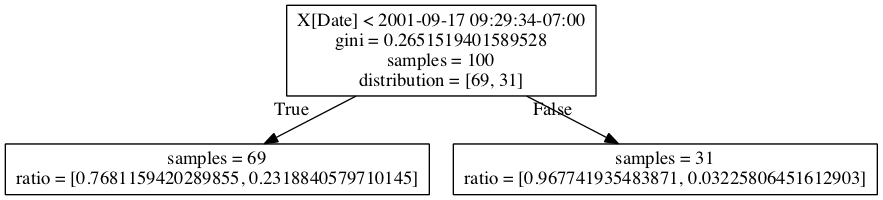

In [10]:
from IPython.display import Image
Image(filename='vis/tree.png')

In [ ]:
test.loc[test['From'].apply(lambda x: x[0]) == 'david.forster@enron.com'].index.values

In [ ]:
members = test.loc[range(0,100)]
left_members = members.loc[members['From'] == 'david.forster@enron.com'].index.values
members.loc[members['From'].apply(lambda x: x [0] == 'david.forster@enron.com')]